# Data Preprocessing


### Libarary and Imports

In [1]:
# Load Libraries
import pandas as pd
import numpy as np
from gensim.utils import simple_preprocess
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from sklearn import preprocessing
from gensim.models import Word2Vec
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anikshikarpuri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anikshikarpuri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
2024-04-01 18:58:45.083612: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read data
train = pd.read_csv ("/Users/anikshikarpuri/Desktop/CAPSTONE/petfinder-adoption-prediction/train/train.csv")


In [3]:
# get a summary of data
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14988,2,NaN,2,266,0,3,1,0,0,2,...,1,4,0,41326,61c84bd7bcb6fb31d2d480b1bcf9682e,0,I have 4 kittens that need to be adopt urgentl...,dc0935a84,3.0,2
14989,2,Serato & Eddie,60,265,264,3,1,4,7,2,...,1,2,0,41326,1d5096c4a5e159a3b750c5cfcf6ceabf,0,Serato(female cat- 3 color) is 4 years old and...,a01ab5b30,3.0,4
14990,2,Monkies,2,265,266,3,5,6,7,3,...,1,5,30,41326,6f40a7acfad5cc0bb3e44591ea446c05,0,"Mix breed, good temperament kittens. Love huma...",d981b6395,5.0,3
14991,2,Ms Daym,9,266,0,2,4,7,0,1,...,1,1,0,41336,c311c0c569245baa147d91fa4e351ae4,0,she is very shy..adventures and independent..s...,e4da1c9e4,3.0,4


## Machine Learning Models


## Feature Engineering

### Age * Type Interaction

In [4]:
train['age_type_interaction'] = train['Age'] * train['Type']

### Changing 'AdoptionSpeed' to Binary

In [5]:
# Assign 0 to "Not Adopted" and 1 to "Adopted"
train['AdoptionStatus'] = train['AdoptionSpeed'].apply(lambda x: 0 if x == 4 else 1)

# Separate samples for each label within the "Adopted" class
adopted_label_1 = train[train['AdoptionSpeed'] == 1]
adopted_label_2 = train[train['AdoptionSpeed'] == 2]
adopted_label_3 = train[train['AdoptionSpeed'] == 3]
adopted_label_4 = train[train['AdoptionSpeed'] == 4]

# Sample an equal number of "Not Adopted" samples for each label within the "Adopted" class
not_adopted_samples = train[train['AdoptionStatus'] == 0]
adopted_downsampled_label_1 = resample(adopted_label_1,
                                       replace=False,
                                       n_samples=len(adopted_label_1),
                                       random_state=42)
adopted_downsampled_label_2 = resample(adopted_label_2,
                                       replace=False,
                                       n_samples=len(adopted_label_2),
                                       random_state=42)
adopted_downsampled_label_3 = resample(adopted_label_3,
                                       replace=False,
                                       n_samples=len(adopted_label_3),
                                       random_state=42)
adopted_downsampled_label_4 = resample(adopted_label_4,
                                       replace=False,
                                       n_samples=len(adopted_label_4),
                                       random_state=42)

# Concatenate the downsampled adopted samples with the not adopted samples
balanced_df = pd.concat([adopted_downsampled_label_1,
                         adopted_downsampled_label_2,
                         adopted_downsampled_label_3,
                         adopted_downsampled_label_4,
                         not_adopted_samples])

# Shuffle the dataset
train = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [6]:
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_type_interaction,AdoptionStatus
0,1,Panda,30,205,0,2,7,0,0,1,...,500,41326,eef145eefa54d9f08c44217170f9560a,0,Panda is a rare Shih Tzu breed that I adopted ...,b7351540f,5.0,3,30,1
1,1,Creamy,72,109,0,2,3,5,0,3,...,0,41326,3b074cadd2350de62dca7056b9bab6f4,0,FOR serious adopters only! Requirements for Ad...,1751240fe,0.0,4,72,0
2,2,NaN,12,299,0,1,3,4,0,2,...,0,41326,d8af7afece71334473575c9f70daf00d,0,"Found at Astaka Field, Pj on 28 May . Will be ...",d1938a57f,1.0,1,24,1
3,2,Rio,8,266,0,1,1,7,0,2,...,0,41326,b9ee99b79d382106af36eba5d362c364,0,He's a very playful and loyal cat. Can be a ve...,b13db9ce8,4.0,1,16,1
4,2,NaN,24,266,299,2,1,2,6,2,...,160,41326,2a6ced77b804df242172dbcc444394d6,0,very active and playful personality cat. atten...,4dd89c859,1.0,4,48,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18775,2,Meme,12,266,266,2,1,7,0,2,...,180,41401,27083c7f0a040994ca84395f4b17d80b,0,Meme is a very friendly and well behave cat~ M...,ee63ca0b4,2.0,4,24,0
18776,2,Sudu,7,299,0,1,1,6,7,1,...,100,41326,525435aafa7bf23c9118850d388ff80c,0,"Sudu is sweet, petite loving tabby boy who was...",00eca0391,5.0,4,14,0
18777,1,Bailey,2,307,0,1,2,0,0,2,...,0,41326,7a22a977b447e38f94017409294d1932,0,"Hello, my name is Bailey and I'm a mongrel. I'...",e1d40ecc1,1.0,2,2,1
18778,1,Jack Russell Terier For Adoption!,1,128,129,3,1,2,7,1,...,0,41401,eaaf22c28570200164914648fdbb9e2e,0,These are the children of a female Jack Russel...,fa1d3af33,2.0,1,1,1


In [7]:
print(train['AdoptionStatus'].value_counts())

1    10386
0     8394
Name: AdoptionStatus, dtype: int64


1    10386
0     8394
Name: AdoptionStatus, dtype: int64


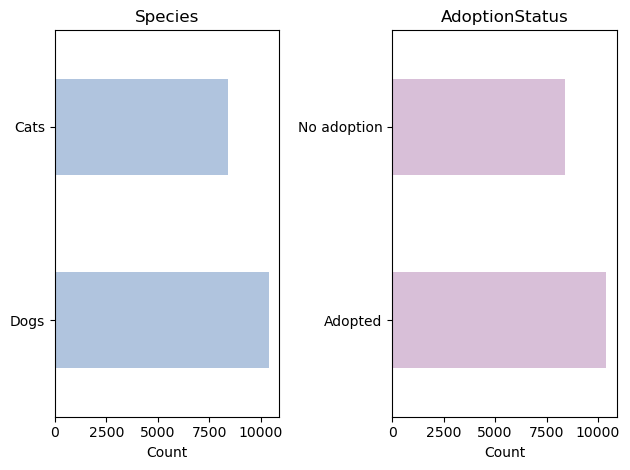

In [8]:
# display species graph
plt.subplot(1, 2, 1)
train['Type'].value_counts().rename({1:'Dogs',2:'Cats'}).plot(kind='barh',color='lightsteelblue')
plt.title('Species')
plt.xlabel('Count')

# display adoption speed graph
plt.subplot(1, 2, 2)
train['AdoptionStatus'].value_counts().rename(
    {0:'No adoption',
     1:'Adopted'}).plot(kind='barh', color='thistle')
plt.title('AdoptionStatus')
plt.xlabel('Count')
print(train['AdoptionStatus'].value_counts())

# minimize overlap
plt.tight_layout()

### Preprocessing 'Description' Variable

In [9]:
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())

    lst_text = text.split()
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in
                    lst_stopwords]

    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]

    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]

    text = " ".join(lst_text)
    return text

lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [10]:
train["Description"] = train["Description"].apply(lambda x:
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=True,
          lst_stopwords=lst_stopwords))

train.head()

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_type_interaction,AdoptionStatus
0,1,Panda,30,205,0,2,7,0,0,1,...,500,41326,eef145eefa54d9f08c44217170f9560a,0,panda rare shih tzu breed adopted 2years ago h...,b7351540f,5.0,3,30,1
1,1,Creamy,72,109,0,2,3,5,0,3,...,0,41326,3b074cadd2350de62dca7056b9bab6f4,0,serious adopter requirement adoption adoption ...,1751240fe,0.0,4,72,0
2,2,NaN,12,299,0,1,3,4,0,2,...,0,41326,d8af7afece71334473575c9f70daf00d,0,found astaka field pj 28 may put adoption clai...,d1938a57f,1.0,1,24,1
3,2,Rio,8,266,0,1,1,7,0,2,...,0,41326,b9ee99b79d382106af36eba5d362c364,0,he playful loyal cat good companion home frien...,b13db9ce8,4.0,1,16,1
4,2,NaN,24,266,299,2,1,2,6,2,...,160,41326,2a6ced77b804df242172dbcc444394d6,0,active playful personality cat attention seeki...,4dd89c859,1.0,4,48,0


In [11]:
def count_words(text):
    return len(text.split())
train['Word_Count'] = train['Description'].apply(lambda x: count_words(x))
print(train.head())

   Type    Name  Age  Breed1  Breed2  Gender  Color1  Color2  Color3  \
0     1   Panda   30     205       0       2       7       0       0   
1     1  Creamy   72     109       0       2       3       5       0   
2     2     NaN   12     299       0       1       3       4       0   
3     2     Rio    8     266       0       1       1       7       0   
4     2     NaN   24     266     299       2       1       2       6   

   MaturitySize  ...  State                         RescuerID  VideoAmt  \
0             1  ...  41326  eef145eefa54d9f08c44217170f9560a         0   
1             3  ...  41326  3b074cadd2350de62dca7056b9bab6f4         0   
2             2  ...  41326  d8af7afece71334473575c9f70daf00d         0   
3             2  ...  41326  b9ee99b79d382106af36eba5d362c364         0   
4             2  ...  41326  2a6ced77b804df242172dbcc444394d6         0   

                                         Description      PetID  PhotoAmt  \
0  panda rare shih tzu breed adopted 2y

In [12]:
# Finding the distribution of word_count
#statistics = train['Word_Count'].describe()
#print(statistics)

### Word2Vec

In [13]:
#from gensim.models import Word2Vec

# Train a Word2Vec model
#model = Word2Vec(sentences=train['Description'], vector_size=100, window=5, min_count=2, workers=4)

# Save the model for later use
#model.save("Word2Vec.model")

# Pad or truncate word vectors to ensure consistency
#word_vectors_padded = pad_sequences(word_vectors, maxlen=35, dtype='float32', padding='post')

#train['word2vec_features'] = word_vectors_padded.tolist()

In [14]:
# Function to convert a document to a vector
#def document_to_vec(words, model):
    # Remove out-of-vocabulary words
#    words = [word for word in words if word in model.wv.key_to_index]
#    if len(words) >= 1:
#        return np.mean(model.wv[words], axis=0)
#    else:
#        return []

# Vectorize each description
#train['vec'] = train['Description'].apply(lambda x: document_to_vec(x, model))


In [15]:
# Assuming all vectors are of the same length, for example, 100 dimensions
#vectorized_df = pd.DataFrame(train['vec'].tolist(), index=train.index)
#vectorized_df

In [16]:
#train['average_vectors'] = vectorized_df.mean(axis=1)

In [17]:
# Assuming you have other features stored in a DataFrame called `other_features_df`
# Concatenate the vectorized descriptions with the other features
# train = pd.concat([vectorized_df, train], axis=1)

In [18]:
#train

### TextBlob

In [19]:
from textblob import TextBlob

# Function to calculate sentiment polarity
def calculate_sentiment(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

# Apply the function to your DataFrame
train['Description_Score'] = train['Description'].apply(calculate_sentiment)

# Quick look at the new column
print(train[['Description', 'Description_Score']].head())

                                         Description  Description_Score
0  panda rare shih tzu breed adopted 2years ago h...           0.085417
1  serious adopter requirement adoption adoption ...          -0.250000
2  found astaka field pj 28 may put adoption clai...           0.000000
3  he playful loyal cat good companion home frien...           0.469444
4  active playful personality cat attention seeki...          -0.133333


In [20]:
train

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed,age_type_interaction,AdoptionStatus,Word_Count,Description_Score
0,1,Panda,30,205,0,2,7,0,0,1,...,eef145eefa54d9f08c44217170f9560a,0,panda rare shih tzu breed adopted 2years ago h...,b7351540f,5.0,3,30,1,32,0.085417
1,1,Creamy,72,109,0,2,3,5,0,3,...,3b074cadd2350de62dca7056b9bab6f4,0,serious adopter requirement adoption adoption ...,1751240fe,0.0,4,72,0,16,-0.250000
2,2,NaN,12,299,0,1,3,4,0,2,...,d8af7afece71334473575c9f70daf00d,0,found astaka field pj 28 may put adoption clai...,d1938a57f,1.0,1,24,1,11,0.000000
3,2,Rio,8,266,0,1,1,7,0,2,...,b9ee99b79d382106af36eba5d362c364,0,he playful loyal cat good companion home frien...,b13db9ce8,4.0,1,16,1,10,0.469444
4,2,NaN,24,266,299,2,1,2,6,2,...,2a6ced77b804df242172dbcc444394d6,0,active playful personality cat attention seeki...,4dd89c859,1.0,4,48,0,18,-0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18775,2,Meme,12,266,266,2,1,7,0,2,...,27083c7f0a040994ca84395f4b17d80b,0,meme friendly well behave cat meme use stay gr...,ee63ca0b4,2.0,4,24,0,48,0.232955
18776,2,Sudu,7,299,0,1,1,6,7,1,...,525435aafa7bf23c9118850d388ff80c,0,sudu sweet petite loving tabby boy rescued pet...,00eca0391,5.0,4,14,0,20,0.312500
18777,1,Bailey,2,307,0,1,2,0,0,2,...,7a22a977b447e38f94017409294d1932,0,hello name bailey im mongrel ive rescued dog p...,e1d40ecc1,1.0,2,2,1,24,0.600000
18778,1,Jack Russell Terier For Adoption!,1,128,129,3,1,2,7,1,...,eaaf22c28570200164914648fdbb9e2e,0,child female jack russell terrier aunt rearthe...,fa1d3af33,2.0,1,1,1,21,0.366667


### Splitting Train & Test

In [21]:
train = train.dropna()

In [22]:
drop = ['Name', 'Breed2', 'Color2','Color3', 'RescuerID', 'PetID', 'Description', 'AdoptionSpeed']
train = train.drop(drop, axis = 1)

X = train.drop(['AdoptionStatus'], axis = 1)
y = train.AdoptionStatus

#Train-Test Split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=0)

# confirm split
print('Training Features Shape:', Xtrain.shape)
print('Training Labels Shape:', ytrain.shape)
print('Testing Features Shape:', Xtest.shape)
print('Testing Labels Shape:', ytest.shape)

Training Features Shape: (13693, 19)
Training Labels Shape: (13693,)
Testing Features Shape: (3424, 19)
Testing Labels Shape: (3424,)


## Approach one - KNeighborsClassifier


In [23]:
Xtrain.columns = Xtrain.columns.astype(str)
Xtest.columns = Xtest.columns.astype(str)

# Choose a class of model
model_knc = KNeighborsClassifier(n_neighbors=1)

# fit the model to the training data
model_knc.fit(Xtrain, ytrain)

# Test it on test data
y_model_knc = model_knc.predict(Xtest)

# accuracy score
train_accuracy_knc = model_knc.score(Xtrain, ytrain)
test_accuracy_knc = model_knc.score(Xtest, ytest)
print("KNeighbors Classifier train accuracy: {:.2f}%".format(train_accuracy_knc * 100))
print("KNeighbors Classifier test accuracy: {:.2f}%".format(test_accuracy_knc * 100))

/Users/anikshikarpuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anikshikarpuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

KNeighbors Classifier train accuracy: 99.96%
KNeighbors Classifier test accuracy: 82.91%


/Users/anikshikarpuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [24]:
X.columns = X.columns.astype(str)
print(X.dtypes)

Type                      int64
Age                       int64
Breed1                    int64
Gender                    int64
Color1                    int64
MaturitySize              int64
FurLength                 int64
Vaccinated                int64
Dewormed                  int64
Sterilized                int64
Health                    int64
Quantity                  int64
Fee                       int64
State                     int64
VideoAmt                  int64
PhotoAmt                float64
age_type_interaction      int64
Word_Count                int64
Description_Score       float64
dtype: object


In [25]:
scores = cross_val_score(model_knc, X, y, cv=5)
print(scores)

# mean score and the 95% confidence interval of the score estimate
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

/Users/anikshikarpuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/anikshikarpuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value Non

[0.8198014  0.82505841 0.8235466  0.83318726 0.82267017]
Accuracy: 0.82 (+/- 0.01)


/Users/anikshikarpuri/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Logsistical Regression

In [26]:
train

,Type,Age,Breed1,Gender,Color1,MaturitySize,FurLength,Vaccinated,Dewormed,Sterilized,Health,Quantity,Fee,State,VideoAmt,PhotoAmt,age_type_interaction,AdoptionStatus,Word_Count,Description_Score
0,1,30,205,2,7,1,2,1,1,2,1,1,500,41326,0,5.0,30,1,32,0.085417
1,1,72,109,2,3,3,3,1,1,1,1,1,0,41326,0,0.0,72,0,16,-0.250000
3,2,8,266,1,1,2,1,1,1,2,1,1,0,41326,0,4.0,16,1,10,0.469444
6,1,36,109,1,3,4,2,1,1,1,1,1,0,41326,0,1.0,36,1,41,0.265000
7,2,7,265,3,2,2,2,2,2,2,1,5,0,41401,0,9.0,14,0,8,-0.133333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18775,2,12,266,2,1,2,1,1,1,2,1,1,180,41401,0,2.0,24,0,48,0.232955
18776,2,7,299,1,1,1,1,1,1,1,1,1,100,41326,0,5.0,14,0,20,0.312500
18777,1,2,307,1,2,2,1,1,1,2,1,1,0,41326,0,1.0,2,1,24,0.600000
18778,1,1,128,3,1,1,2,2,3,3,1,3,0,41401,0,2.0,1,1,21,0.366667


In [27]:
# encode categorical data and create pipeline for automating the process for new data
# Need to put missing features
numeric_features = ['Age','Fee','VideoAmt','PhotoAmt','Quantity', 'Description_Score', 'age_type_interaction']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['Type','Gender','MaturitySize','FurLength','Vaccinated',
                        'Dewormed','Sterilized','Health','Breed1','Color1', 'Word_Count']

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value=-1)),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])
# instantiate model
model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier',
                   LogisticRegression(solver='lbfgs', multi_class='auto',max_iter = 15000))])

## TODO Figure out what features are actually being used. Are your age_interaction and word count etc...
##    features being passed through unscaled? Or are they being left out? Same question for the logistic regression model etc...

# fit model to data
model_lr.fit(Xtrain,ytrain)

# Make predictions on test data
y_model_lr = model_lr.predict(Xtest)

# accuracy score
train_accuracy_lr = model_lr.score(Xtrain, ytrain)
test_accuracy_lr = model_lr.score(Xtest, ytest)
print("Logistic Regression train accuracy: {:.2f}%".format(train_accuracy_lr * 100))
print("Logistic Regression test accuracy: {:.2f}%".format(test_accuracy_lr * 100))

Logistic Regression train accuracy: 68.24%
Logistic Regression test accuracy: 66.85%


## RandomForest

In [28]:
model_1 = Pipeline(steps=[('preprocessor', preprocessor),
                  ('classifier',
                   RandomForestClassifier(n_jobs=-1, n_estimators=300)
                     )])
model_1.fit(Xtrain,ytrain)

# make predictions on test data
y_model_randomforest = model_1.predict(Xtest)

# accuracy score
train_accuracy_rf = model_1.score(Xtrain, ytrain)
test_accuracy_rf = model_1.score(Xtest, ytest)
print("Random Forest train accuracy: {:.2f}%".format(train_accuracy_rf * 100))
print("Random Forest test accuracy: {:.2f}%".format(test_accuracy_rf * 100))

Random Forest train accuracy: 99.97%
Random Forest test accuracy: 87.32%


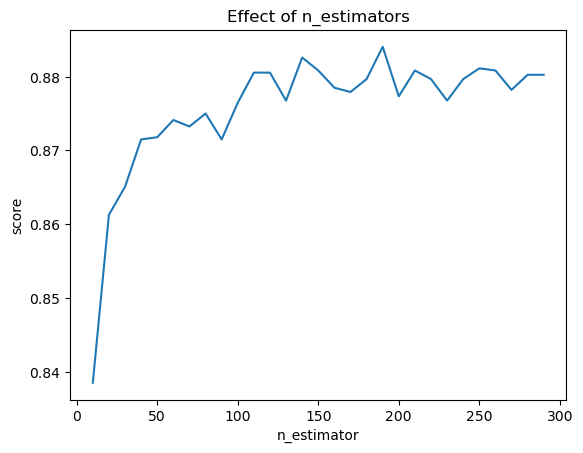

In [29]:
# Set the number of jobs to run in parallel. -1 means using all processors
model = RandomForestClassifier(n_jobs=-1)

# Try different numbers of n_estimators
# These values represent different numbers of trees (n_estimators) to be used in the Random Forest model.
estimators = np.arange(10, 300, 10) #generating an array of values from 10 to 290 in steps of 10.
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(Xtrain, ytrain)
    scores.append(model.score(Xtest, ytest))

# show how n_estimators will affect the scores)
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

#### Based on the graph, it appears that the decision has been made to select 150 as the number of estimators (n_estimators) for the RandomForestClassifier. This choice seems to strike a balance between a good score and computational efficiency.

In [30]:
# instantiate model
model_randomforest = RandomForestClassifier(n_estimators=150)
model_randomforest.fit(Xtrain,ytrain)

# make predictions on test data
y_model_randomforest = model_randomforest.predict(Xtest)

# accuracy score
train_accuracy_rf = model_randomforest.score(Xtrain, ytrain)
test_accuracy_rf = model_randomforest.score(Xtest, ytest)
print("Random Forest train accuracy: {:.2f}%".format(train_accuracy_rf * 100))
print("Random Forest test accuracy: {:.2f}%".format(test_accuracy_rf * 100))

Random Forest train accuracy: 99.97%
Random Forest test accuracy: 88.08%


In [31]:
feature_imp = pd.Series(model_randomforest.feature_importances_,index=X.columns).sort_values(ascending=False) #creates a Series mapping each feature to its importance score as determined by the random forest model.
feature_imp

Description_Score       0.142554
Word_Count              0.140140
Age                     0.096275
PhotoAmt                0.091842
age_type_interaction    0.077582
Breed1                  0.077324
Color1                  0.050999
State                   0.046716
Sterilized              0.038185
Quantity                0.034231
Fee                     0.032316
FurLength               0.031834
Gender                  0.030808
MaturitySize            0.030678
Dewormed                0.026229
Vaccinated              0.025927
Type                    0.010732
Health                  0.008291
VideoAmt                0.007338
dtype: float64

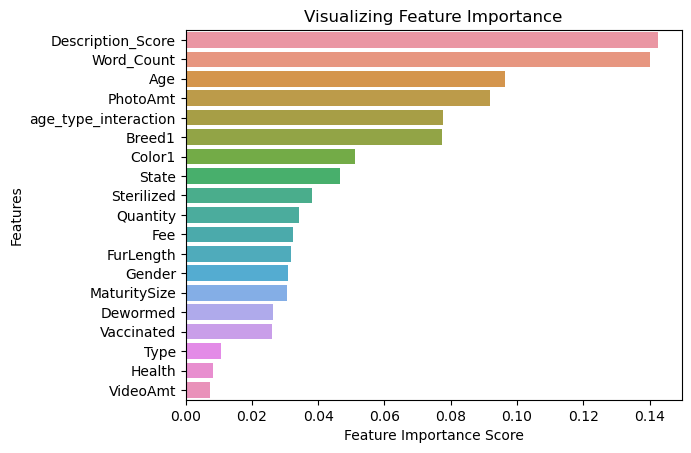

In [32]:
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Feature Importance")
plt.show()

#### Feature importances are typically computed as the average reduction in impurity that is brought by that feature across all the trees in the forest.

## Hyperparamter Tuning

#### Improve result using grid search and cross validation



In [33]:
# Create the parameter grid based on the results of random search
param_grid = {
    'bootstrap': [True],               # Method of selecting samples for training each tree, will sample with replacement.
    'max_depth': [120, 140, 150, 160], # Maximum number of levels in tree.
    'max_features': [3, 4, 5],        # Number of features to consider at every split
    'min_samples_leaf': [3, 4, 5],     # Minimum number of samples required at each leaf node
    'min_samples_split': [8, 10, 12],  # Minimum number of samples required to split a node
    'n_estimators': [100, 200, 300]    # Number of trees in random forest
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 10, n_jobs = -1, verbose = 2)
grid.fit(Xtrain, ytrain);
grid.best_params_

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.8s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.9s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.9s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.9s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.8s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   5.9s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   6.0s
[CV] END bootstrap=True, max_depth=120, max_features=3, min_sa

{'bootstrap': True,
 'max_depth': 120,
 'max_features': 5,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

### ^ The cross validation has gave us the following results and optimal paramters

In [34]:
model = grid.best_estimator_
y_model = model.predict(Xtest)
y_model_train = model.predict(Xtrain)

# accuracy
print("Random Forest Train Accuracy: ", accuracy_score(ytrain, y_model_train))
print("Random Forest Test Accuracy: ", accuracy_score(ytest, y_model))

Random Forest Train Accuracy:  0.9563280508288907
Random Forest Test Accuracy:  0.8136682242990654


## Evaluation


### Top 5 features


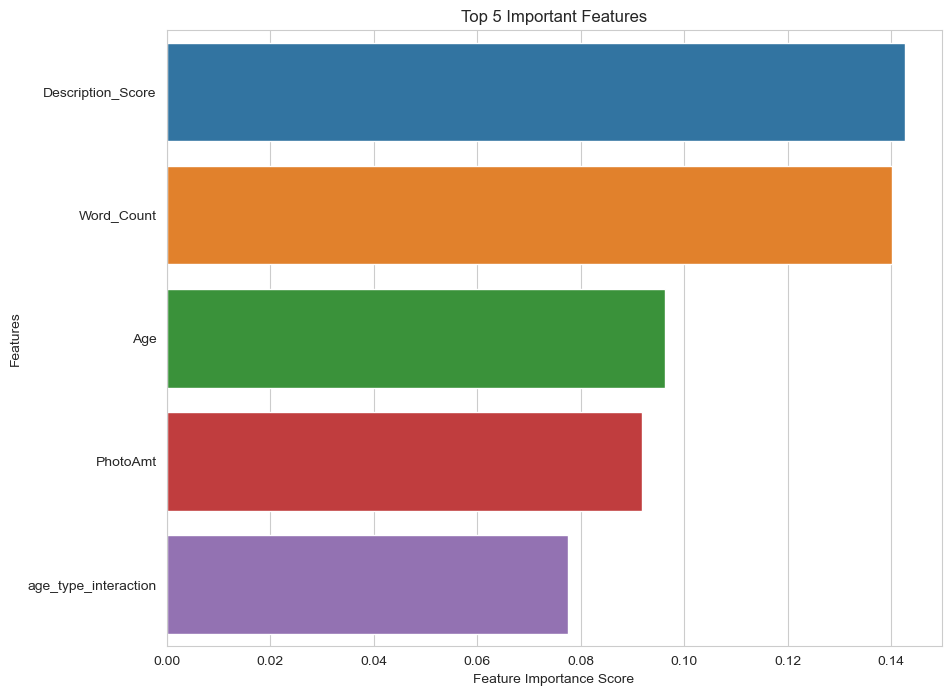

In [35]:
top_10_features = feature_imp[:5]
plt.figure(figsize=(10, 8))
sns.set_style("whitegrid")
sns.barplot(x=top_10_features, y=top_10_features.index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Top 5 Important Features")
plt.show()

### Performance Metrics

Due to the simplicity of the data, which used to be multi-class, the results could be due to trivial data (classification model was 78% testing accuracy)

## Error Analysis

#### Confusion Matrix

Confusion Matrix (Test Set):
 [[1189  308]
 [ 330 1597]]

Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.78      0.79      0.79      1497
           1       0.84      0.83      0.83      1927

    accuracy                           0.81      3424
   macro avg       0.81      0.81      0.81      3424
weighted avg       0.81      0.81      0.81      3424



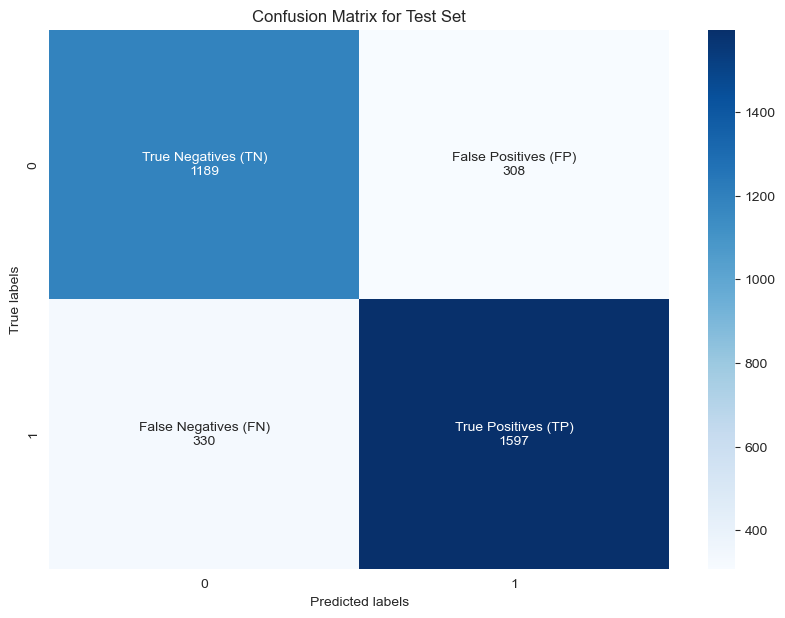

Random Forest Train Accuracy:  0.9563280508288907
Random Forest Test Accuracy:  0.8136682242990654


In [38]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix for the test set predictions
conf_matrix_test = confusion_matrix(ytest, y_model)

# Generate a classification report for the test set predictions
class_report_test = classification_report(ytest, y_model)

print("Confusion Matrix (Test Set):\n", conf_matrix_test)
print("\nClassification Report (Test Set):\n", class_report_test)

# Create the labels for the confusion matrix
labels = np.array([['True Negatives (TN)', 'False Positives (FP)'],
                   ['False Negatives (FN)', 'True Positives (TP)']])

# Format the labels with the corresponding counts from the confusion matrix
labels_with_counts = (np.asarray(["{0}\n{1}".format(text, count)
                                  for text, count in zip(labels.flatten(),
                                                         conf_matrix_test.flatten())])
                      ).reshape(2,2)

# Visualization of the confusion matrix for the test set with labeled counts
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_test, annot=labels_with_counts, fmt='', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Test Set')
plt.show()

# Accuracy reported earlier
print("Random Forest Train Accuracy: ", accuracy_score(ytrain, y_model_train))
print("Random Forest Test Accuracy: ", accuracy_score(ytest, y_model))
